<a href="https://colab.research.google.com/github/derewor/Plant_Health_Prediction_Project/blob/main/Plant_Health_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

In [3]:
# import the dataset
df = pd.read_csv('/content/plant_health_data.csv', delimiter=';')
df.head(2)

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress


In [4]:
# The total number of rows and columns of the dataset
df.shape

(1200, 14)

In [5]:
# Check for datatypes and nullvalues of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), int64(1), object(2)
memo

In [6]:
# how is the distribution of the data?
df.describe()

,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,5.500000,25.106918,23.999130,19.957794,54.853165,612.637265,6.524102,30.106751,30.264484,30.112088,34.749591,0.987764
std,2.873479,8.677725,3.441561,2.932073,8.784916,228.318853,0.581755,11.514396,11.466846,11.668085,8.766995,0.575116
min,1.000000,10.000724,18.001993,15.003710,40.028758,200.615482,5.507392,10.003650,10.017690,10.000606,20.025511,0.002376
25%,3.000000,17.131893,21.101766,17.353027,47.019694,416.878983,6.026042,20.249774,20.894445,19.585561,27.463350,0.487982
50%,5.500000,25.168333,23.889044,19.911473,54.692069,617.240221,6.540524,30.138590,30.019385,30.495054,34.433427,0.981647
75%,8.000000,32.370231,27.042634,22.596851,62.451053,811.474690,7.030039,40.184737,40.131459,40.108296,42.232637,1.473142
max,10.000000,39.993164,29.990886,24.995929,69.968871,999.856262,7.497823,49.951136,49.980700,49.981945,49.990811,1.996116


The mean and the median are very close suggesting the good quality of the data.

In [7]:
num_features = [col for col in df.columns if col != 'Plant_ID' and col != 'Timestamp' and col != 'Plant_Health_Status']
num_features

['Soil_Moisture',
 'Ambient_Temperature',
 'Soil_Temperature',
 'Humidity',
 'Light_Intensity',
 'Soil_pH',
 'Nitrogen_Level',
 'Phosphorus_Level',
 'Potassium_Level',
 'Chlorophyll_Content',
 'Electrochemical_Signal']

In [8]:
# what is the proportion of the three plant health categories.
df.Plant_Health_Status.value_counts()

,count
Plant_Health_Status,
High Stress,500
Moderate Stress,401
Healthy,299


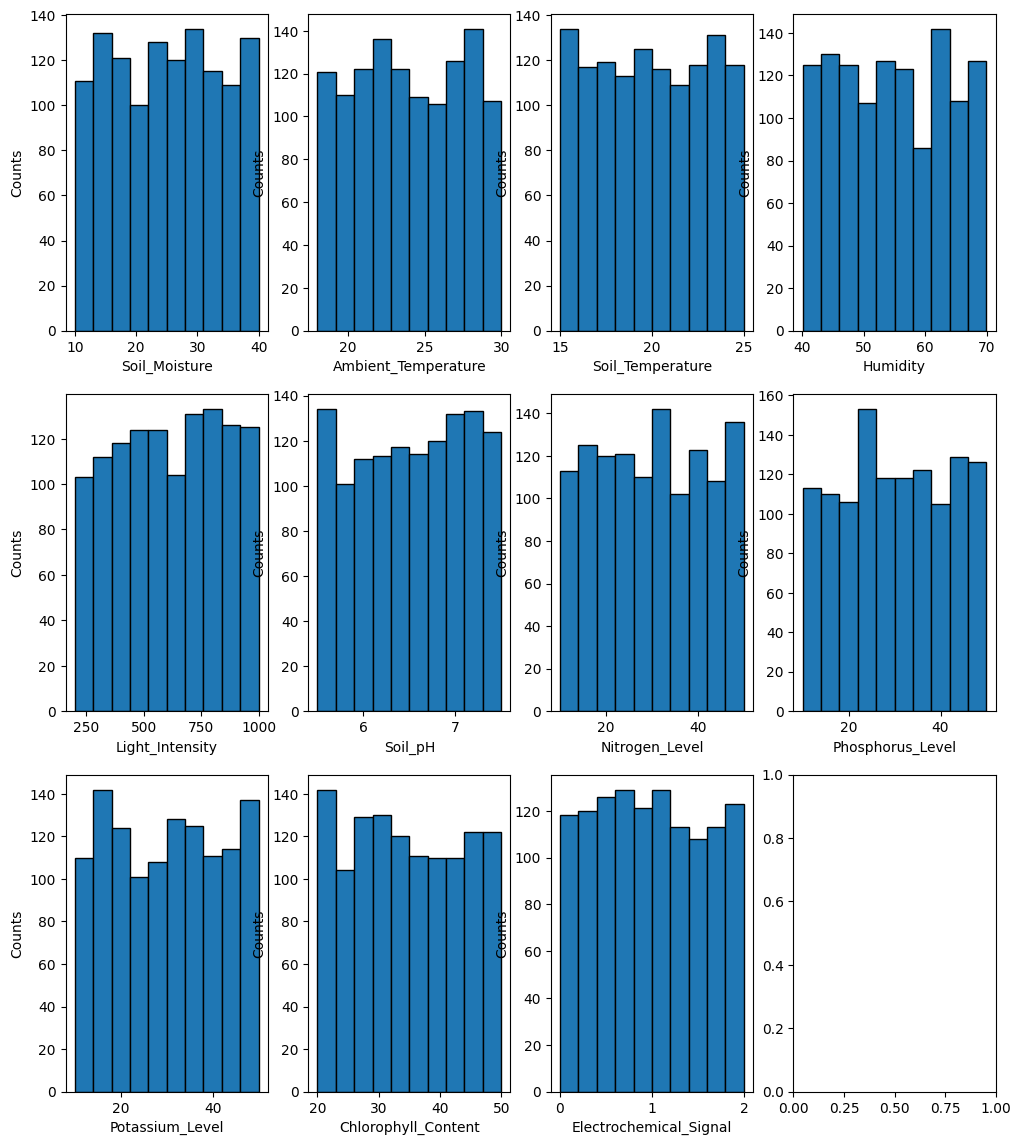

In [9]:
# plot the num_features to observe the distribution of the values
fig, axs = plt.subplots(3, 4, figsize=(12, 14))
axs = axs.flatten()

# Plot histograms for each column
for i, col in enumerate(num_features):
    axs[i].hist(df[col], bins=10, edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Counts')

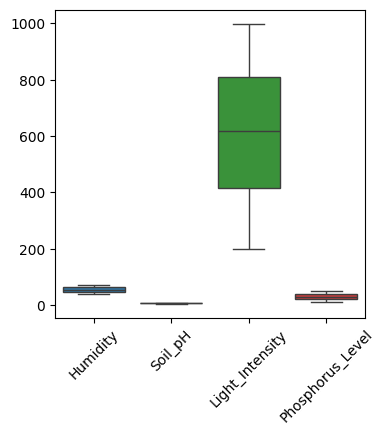

In [10]:
plt.figure(figsize=(4,4))
sns.boxplot(df[['Humidity','Soil_pH','Light_Intensity','Phosphorus_Level']])
plt.xticks(rotation=45)
plt.show()

In [11]:
# Before spliting the data into train and test samples, convert the categorical variabe Plant_health_status
# into numerical.
phs_encoded = pd.get_dummies(df['Plant_Health_Status'])
phs_encoded = phs_encoded.apply(lambda row: row.map({True:1, False:0}) )
phs_encoded.head()

,Healthy,High Stress,Moderate Stress
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [12]:
# Merge the one-hot encoded categorical feature with num_features.
features = pd.concat([df[num_features], phs_encoded], axis=1)
features.head()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Healthy,High Stress,Moderate Stress
0,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,0,1,0
1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,0,1,0
2,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,0,1,0
3,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,0,1,0
4,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,0,1,0


In [22]:
# STEP1. determine the numerical features and the target feature
X = df[num_features] # num_features
Y = df['Plant_Health_Status'] # target feature
class_names = Y.unique()
class_names

array(['High Stress', 'Moderate Stress', 'Healthy'], dtype=object)

In [14]:
# STEP 2. Split the features into train and test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42 )
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(960, 11)
(240, 11)
(960,)
(240,)


In [23]:
# select and train a model.
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
fittness = classification_report(Y_test, y_pred, target_names=class_names)
print(fittness)

                 precision    recall  f1-score   support

    High Stress       1.00      1.00      1.00        65
Moderate Stress       1.00      0.99      0.99        85
        Healthy       0.99      1.00      0.99        90

       accuracy                           1.00       240
      macro avg       1.00      1.00      1.00       240
   weighted avg       1.00      1.00      1.00       240



In [38]:
df[num_features].describe().loc[['min', 'max']]

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
min,10.000724,18.001993,15.003710,40.028758,200.615482,5.507392,10.003650,10.01769,10.000606,20.025511,0.002376
max,39.993164,29.990886,24.995929,69.968871,999.856262,7.497823,49.951136,49.98070,49.981945,49.990811,1.996116


In [54]:
# Generate a jypothetical data based on the min and max values of the original data to test the prediction.
Soil_Moisture = np.random.uniform(10, 40, 100)
Ambient_Temperature = np.random.uniform(18, 30, 100)
Soil_Temperature = np.random.uniform(15, 25, 100)
Humidity = np.random.uniform(40, 70, 100)
Light_Intensity = np.random.uniform(200, 1000, 100)
Soil_pH = np.random.uniform(5.5, 7.5, 100)
Nitrogen_Level = np.random.uniform(10, 50, 100)
Phosphorus_Level = np.random.uniform(10, 50, 100)
Potassium_Level = np.random.uniform(10, 50, 100)
Chlorophyll_Content = np.random.uniform(20, 50, 100)
Electrochemical_Signal = np.random.uniform(0, 2, 100)

In [44]:
# Create a dataframe from the hypothetical data above.
df_hypo = pd.DataFrame([Soil_Moisture,
                        Ambient_Temperature,
                        Soil_Temperature,
                        Humidity,
                        Light_Intensity,
                        Soil_pH,
                        Nitrogen_Level,
                        Phosphorus_Level,
                        Potassium_Level,
                        Chlorophyll_Content,
                        Electrochemical_Signal])

In [61]:
# The dataframe put the feature names in rows and need to be transposed.
df1 = df_hypo.T
df1.columns = ['Soil_Moisture',
               'Ambient_Temperature',
               'Soil_Temperature',
               'Humidity',
               'Light_Intensity',
               'Soil_pH',
               'Nitrogen_Level',
               'Phosphorus_Level',
               'Potassium_Level',
               'Chlorophyll_Content',
               'Electrochemical_Signal']
df1

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
0,25.545665,20.457852,21.455535,41.008795,916.732525,6.781641,17.966172,24.036266,39.067950,33.638752,0.944226
1,35.086047,21.991150,16.843656,66.497252,641.795584,5.783831,26.186829,37.127080,39.340180,21.169537,0.859840
2,35.541871,24.072900,15.789741,47.959757,662.607419,6.102754,40.092414,31.156285,43.765607,47.575507,0.780043
3,23.092173,26.520720,19.641526,44.665881,515.088282,6.650758,33.586866,16.576993,20.628688,34.511527,1.974777
4,38.512435,24.242998,20.458007,44.223375,645.354779,6.062200,34.515618,44.132925,37.419616,37.743076,0.600262
...,...,...,...,...,...,...,...,...,...,...,...
95,26.002932,23.882682,16.825400,56.601466,412.080210,6.831139,19.907725,34.465000,38.749799,21.286667,0.112227
96,21.265459,26.536011,17.508515,65.213326,589.552047,7.034161,26.223646,39.814634,34.467156,29.447157,1.207156
97,37.060811,22.657124,16.010940,61.559425,998.197748,5.695102,20.335413,44.745092,24.906735,41.973224,1.430940
98,37.346657,24.916587,23.674097,48.421733,673.558567,6.745464,48.961920,36.884116,37.714316,38.501579,0.081908


In [69]:
# Now based on the model fitted above classify the pehnotyepe of the 100 hypothetical plants grown on this field condition.
x_test = df1
y_hat = model.predict(x_test)
y_hat = pd.DataFrame(y_hat)
y_hat.value_counts()

,count
0,
Moderate Stress,47
High Stress,32
Healthy,21


In [78]:
# Determine the probability of being true for each value
probabilities = model.predict_proba(x_test)
probabilities = pd.DataFrame(probabilities)
prediction_probabilities = pd.concat([y_hat, probabilities], axis=1)
prediction_probabilities

,0,0,1,2
0,Moderate Stress,0.01,0.05,0.94
1,Healthy,0.91,0.01,0.08
2,Healthy,0.94,0.01,0.05
3,Moderate Stress,0.06,0.07,0.87
4,Healthy,0.92,0.01,0.07
...,...,...,...,...
95,Moderate Stress,0.03,0.05,0.92
96,Moderate Stress,0.03,0.01,0.96
97,Healthy,0.69,0.03,0.28
98,Healthy,0.90,0.02,0.08
